In [1]:
import  pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


# 출입문별 태그 기록 집계

In [2]:
car = pd.read_csv('VW_InCarinfo (차량 입차 정보 조회).csv')
car_out = pd.read_csv('VW_OutCarinfo (차량 출차 정보 조회).csv')
car_out = car_out.dropna()
car = car.dropna()

car['입차시간'] = car['입차일자'] + " " + car['입차시각']
car['입차시간'] = pd.to_datetime(car['입차시간'])


car_out['출차시간'] = car_out['출차일자'] + " " + car_out['출차시각']
car_out['출차시간'] = pd.to_datetime(car_out['출차시간'])

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_17732/2869381629.py:1: DtypeWarning: Columns (0,1,2,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  car = pd.read_csv('VW_InCarinfo (차량 입차 정보 조회).csv')


In [3]:
date = pd.DataFrame(car['입차일자'].value_counts())
date.reset_index(inplace=True)
date['index']= date['index'].apply(lambda x: x[5:10])
date = date.sort_values('index')

Text(0.5, 1.0, '날짜별 차량 입차 대수')

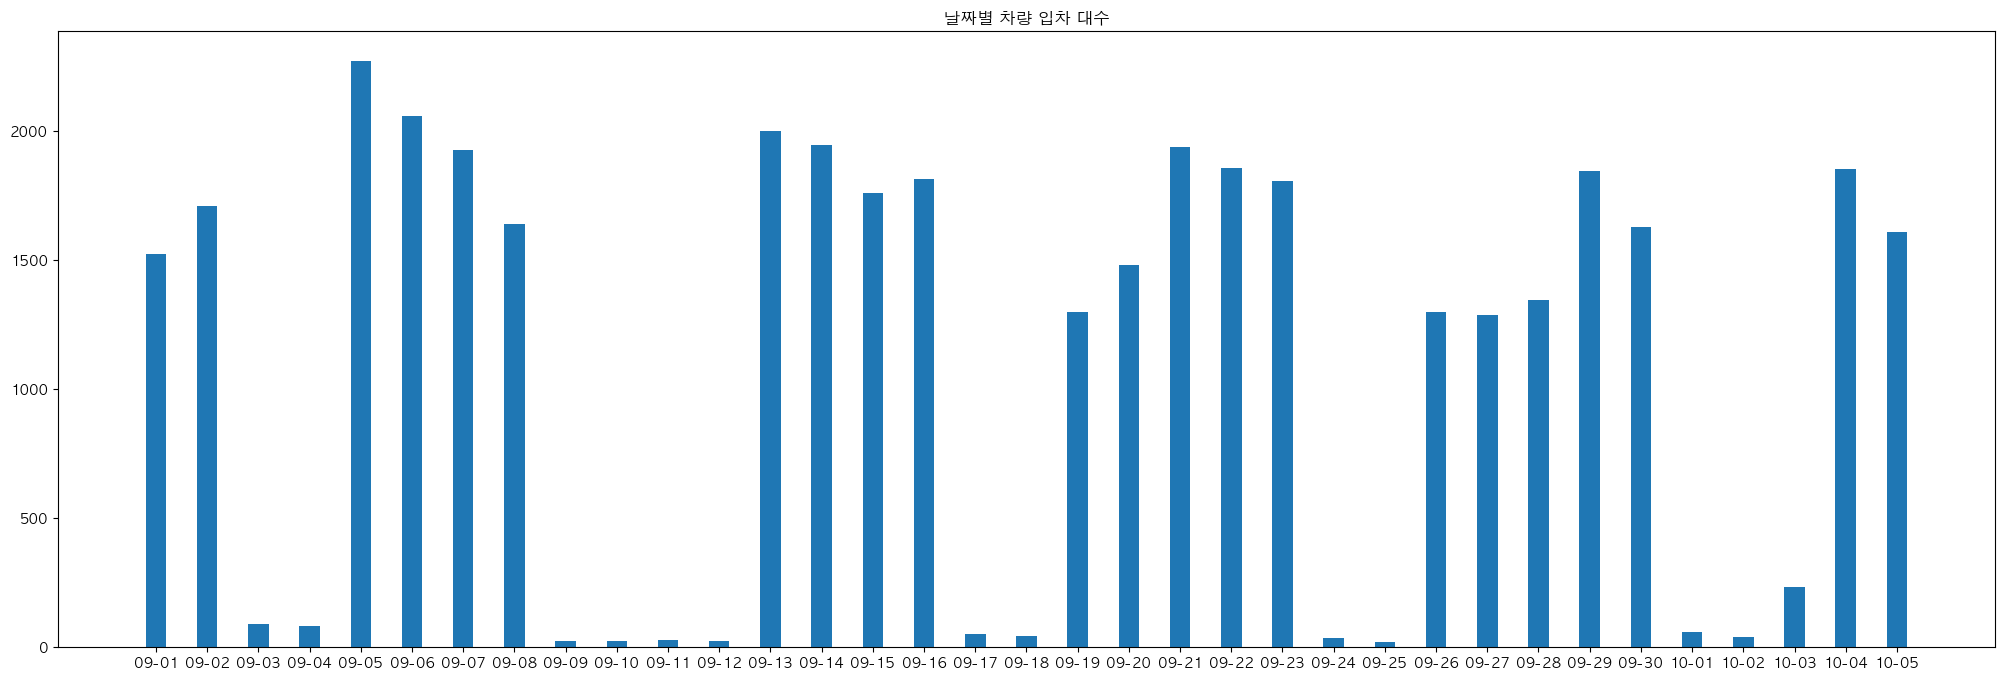

In [4]:
# 날짜별 차량 입차 대수
plt.figure(figsize=(25,8))
plt.bar(date['index'], date['입차일자'], width=0.4)
plt.title('날짜별 차량 입차 대수')

In [5]:
date

index  입차일자
16  09-01  1526
12  09-02  1709
23  09-03    91
24  09-04    81
0   09-05  2274
1   09-06  2058
5   09-07  1926
13  09-08  1640
31  09-09    25
32  09-10    24
30  09-11    29
33  09-12    23
2   09-13  2003
3   09-14  1946
11  09-15  1760
9   09-16  1817
26  09-17    53
27  09-18    45
19  09-19  1299
17  09-20  1482
4   09-21  1940
6   09-22  1856
10  09-23  1807
29  09-24    36
34  09-25    20
20  09-26  1299
21  09-27  1288
18  09-28  1346
8   09-29  1846
14  09-30  1629
25  10-01    59
28  10-02    38
22  10-03   232
7   10-04  1854
15  10-05  1611

Text(0.5, 1.0, '주차장별 입차 대수')

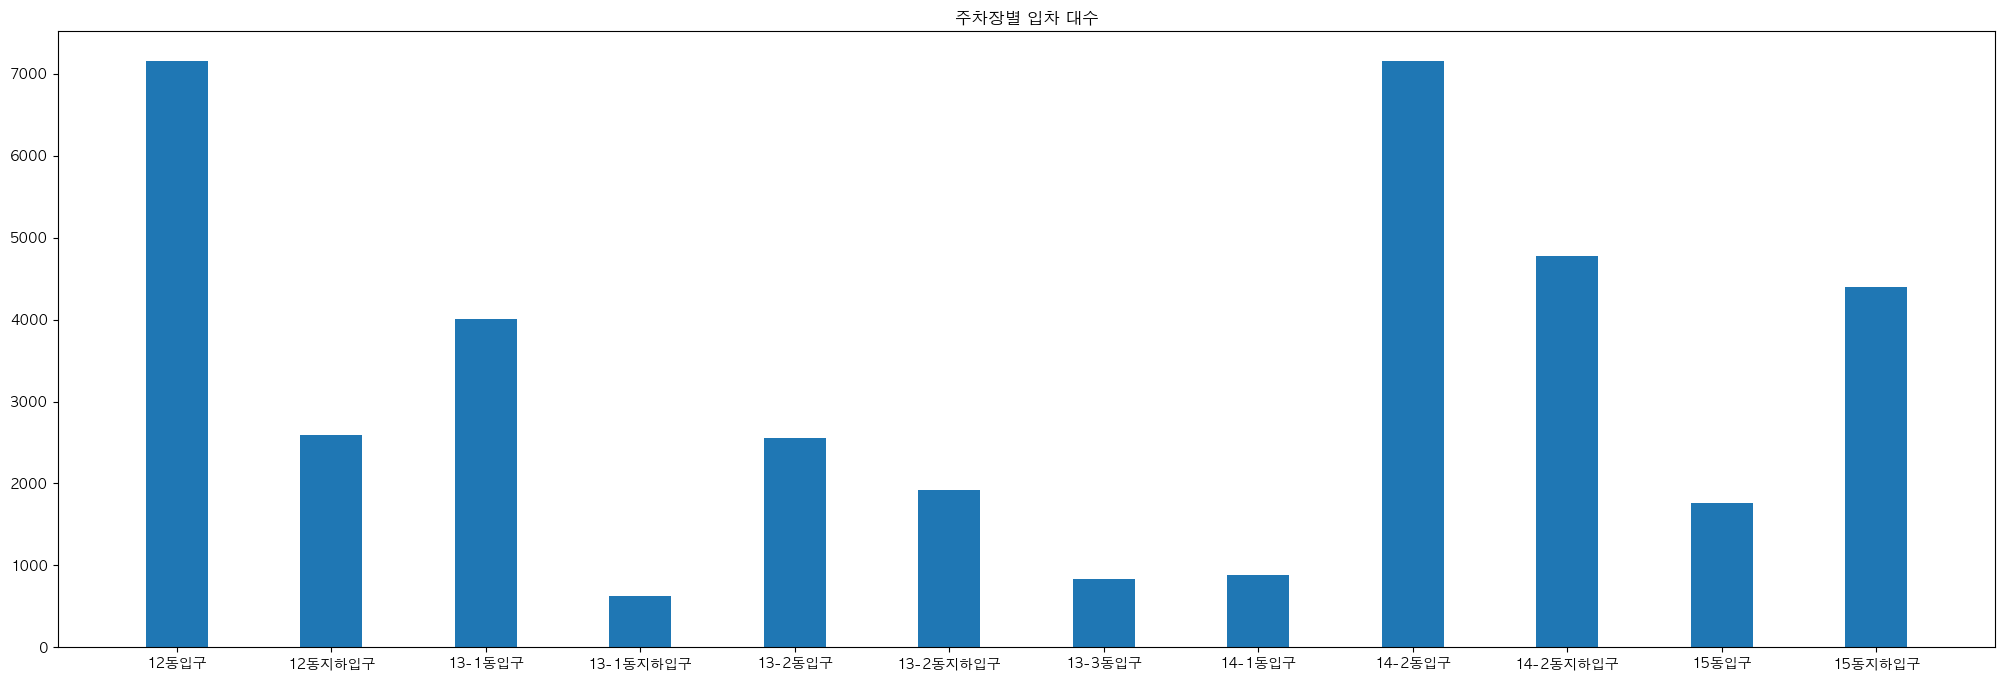

In [6]:
location = pd.DataFrame(car['장비명'].value_counts())
location.reset_index(inplace=True)
location = location.sort_values('index')

#동 입구별 차량 입차 대수
plt.figure(figsize=(25,8))
plt.bar(location['index'], location['장비명'], width=0.4)
plt.title('주차장별 입차 대수')


In [7]:
location

index   장비명
0       12동입구  7162
5     12동지하입구  2586
4     13-1동입구  4005
11  13-1동지하입구   620
6     13-2동입구  2558
7   13-2동지하입구  1926
10    13-3동입구   839
9     14-1동입구   879
1     14-2동입구  7161
2   14-2동지하입구  4779
8       15동입구  1763
3     15동지하입구  4394

Text(0.5, 1.0, '주차장별 출차 대수')

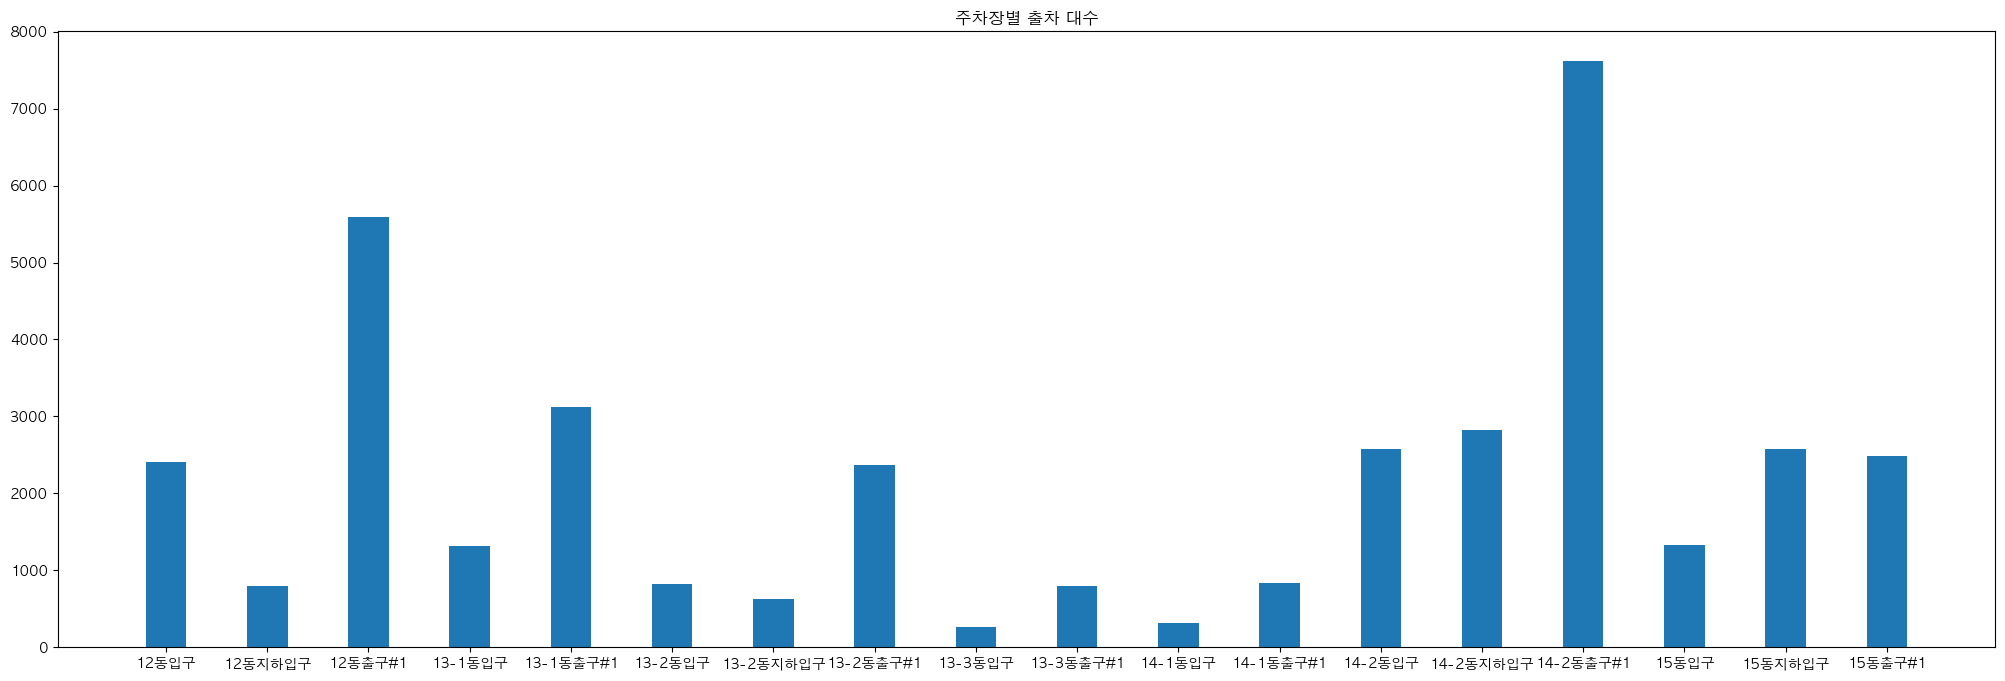

In [8]:

location = pd.DataFrame(car_out['장비명'].value_counts())
location.reset_index(inplace=True)
location = location.sort_values('index')

#동 입구별 차량 출차 대수
plt.figure(figsize=(25,8))
plt.bar(location['index'], location['장비명'], width=0.4)
plt.title('주차장별 출차 대수')

In [9]:
location

index   장비명
7       12동입구  2413
13    12동지하입구   799
1     12동출구#1  5586
10    13-1동입구  1317
2   13-1동출구#1  3124
12    13-2동입구   823
15  13-2동지하입구   621
8   13-2동출구#1  2375
17    13-3동입구   260
14  13-3동출구#1   793
16    14-1동입구   310
11  14-1동출구#1   832
4     14-2동입구  2579
3   14-2동지하입구  2828
0   14-2동출구#1  7624
9       15동입구  1324
5     15동지하입구  2579
6     15동출구#1  2485

<BarContainer object of 3 artists>

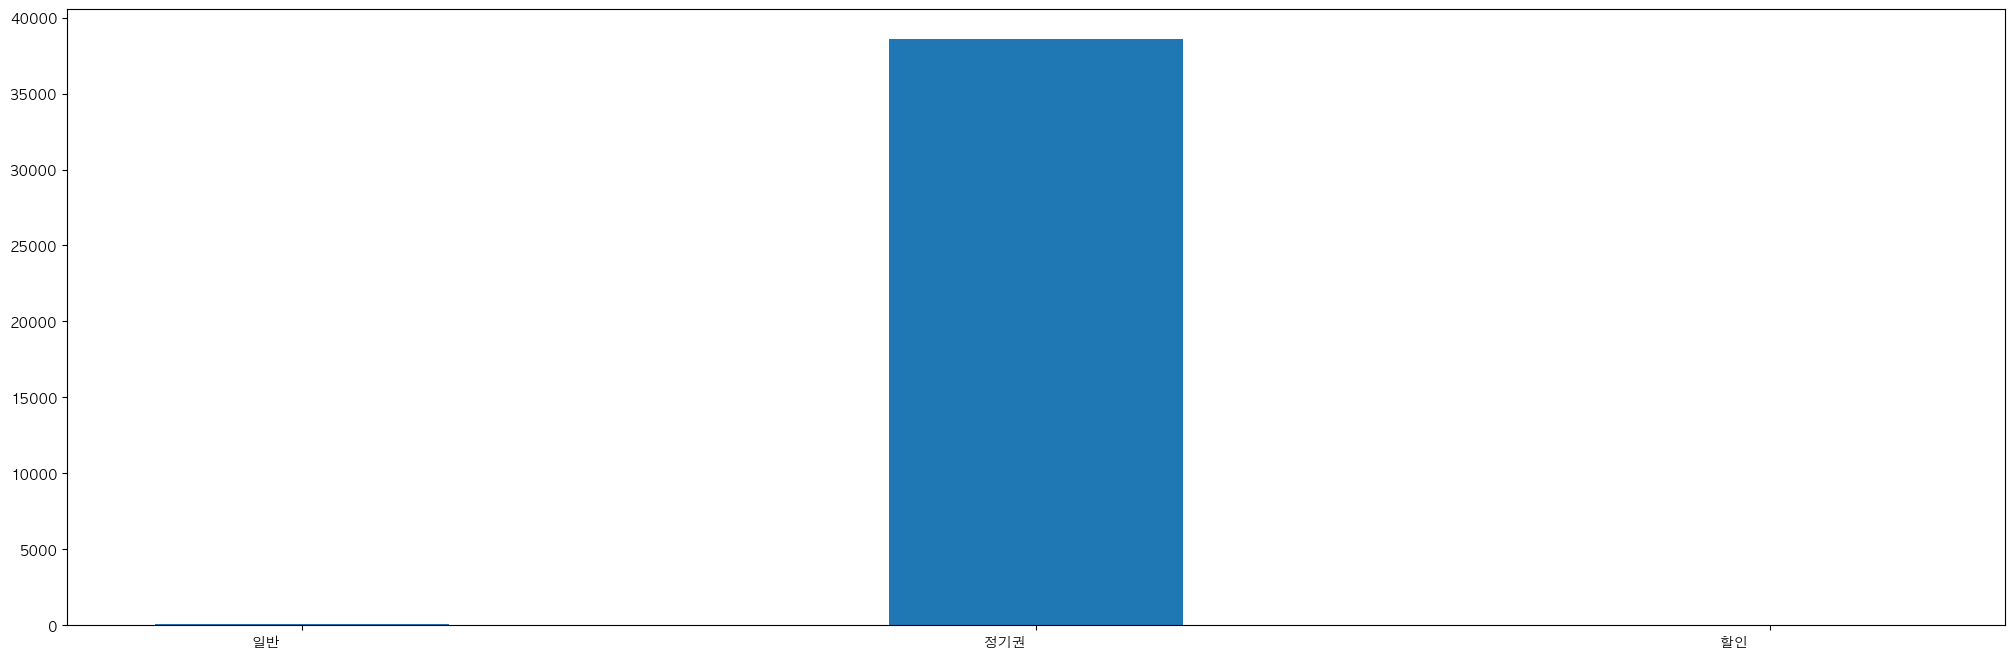

In [10]:
location = pd.DataFrame(car['입차고객구분'].value_counts())
location.reset_index(inplace=True)
location = location.sort_values('index')

#동 입구별 차량 입차 대수
plt.figure(figsize=(25,8))
plt.bar(location['index'], location['입차고객구분'], width=0.4)

In [11]:
location = pd.DataFrame(car['입차고객구분'].value_counts())
location.reset_index(inplace=True)
location = location.sort_values('index')
location

index  입차고객구분
1  일반                      53
0   정기권                 38616
2  할인                       3

# 시간대별 입차 - 출차 구분

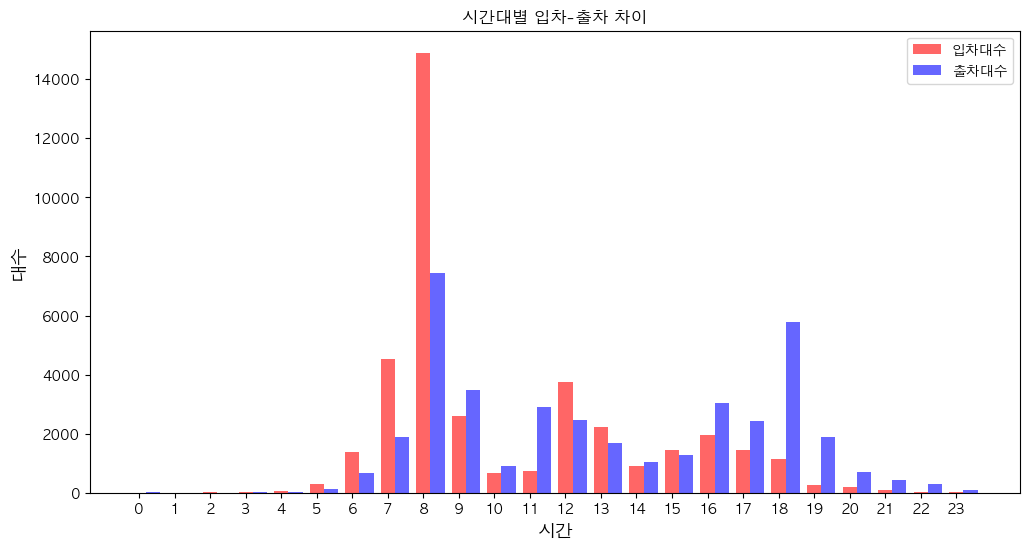

In [12]:

time = pd.concat([car['입차시간'].dt.hour.value_counts(), car_out['출차시간'].dt.hour.value_counts()], axis =1)
time.reset_index(inplace=True)
time = time.sort_values('index')
time.columns = ['시간','입차대수','출차대수']
time['입차누계'] = time['입차대수'].cumsum()
time['출차누계'] = time['출차대수'].cumsum()
time['대수'] = time['입차누계'] - time['출차누계']



# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.4

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(24)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, time['입차대수'], bar_width, alpha=0.6, color='red', label='입차대수')

b2 = plt.bar(index + bar_width, time['출차대수'], bar_width, alpha=0.6, color='blue', label='출차대수')

plt.xticks(range(24), range(24))

# x축, y축 이름 및 범례 설정
plt.xlabel('시간', size = 13)
plt.ylabel('대수', size = 13)
plt.legend()
plt.title('시간대별 입차-출차 차이')
plt.show()


([<matplotlib.axis.XTick at 0x11f789940>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

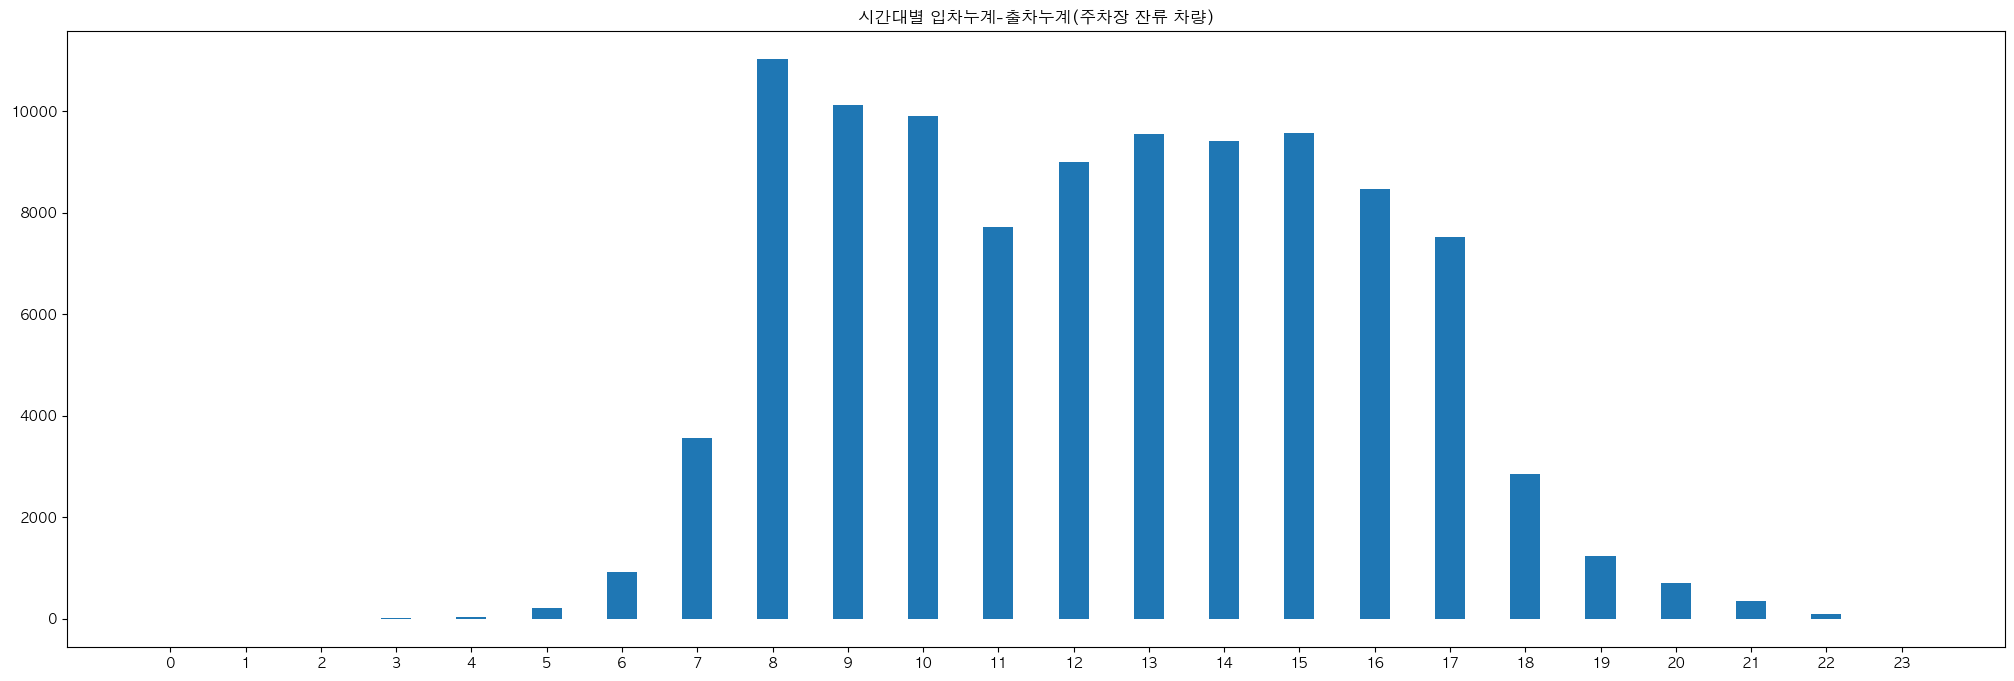

In [13]:
time['입차누계'] = time['입차대수'].cumsum()
time['출차누계'] = time['출차대수'].cumsum()
time['대수'] = time['입차누계'] - time['출차누계']
plt.figure(figsize=(25,8))
plt.bar(time['시간'], time['대수'], width=0.4)
plt.title('시간대별 입차누계-출차누계(주차장 잔류 차량)')
plt.xticks(range(24), range(24))

In [14]:
time

시간   입차대수  출차대수   입차누계   출차누계     대수
23   0      4    13      4     13     -9
22   1      7     5     11     18     -7
21   2     11     5     22     23     -1
18   3     28    12     50     35     15
17   4     48    26     98     61     37
13   5    282   115    380    176    204
8    6   1378   660   1758    836    922
1    7   4539  1899   6297   2735   3562
0    8  14901  7437  21198  10172  11026
3    9   2591  3495  23789  13667  10122
12  10    683   901  24472  14568   9904
11  11    724  2904  25196  17472   7724
2   12   3755  2473  28951  19945   9006
4   13   2239  1696  31190  21641   9549
10  14    913  1048  32103  22689   9414
7   15   1455  1290  33558  23979   9579
5   16   1945  3049  35503  27028   8475
6   17   1461  2420  36964  29448   7516
9   18   1129  5783  38093  35231   2862
14  19    273  1903  38366  37134   1232
15  20    184   709  38550  37843    707
16  21     84   441  38634  38284    350
19  22     26   286  38660  38570     90
20  23     12   102  38672  38672      0

# 체류시간

## 주차일련번호 > 중복 많음
## 입차시간 == 출차시간 인 경우는 ??

In [15]:
pd.options.display.float_format = '{:.0f}'.format

In [196]:
car['장비명'].value_counts()

12동입구        7162
14-2동입구      7161
14-2동지하입구    4779
15동지하입구      4394
13-1동입구      4005
12동지하입구      2586
13-2동입구      2558
13-2동지하입구    1926
15동입구        1763
14-1동입구       879
13-3동입구       839
13-1동지하입구     620
Name: 장비명, dtype: int64

In [195]:
car_out[car_out['장비명'] == '14-2동지하입구']['출차구분'].value_counts()

중복                    1924
정상                     904
Name: 출차구분, dtype: int64

In [192]:
car_out[car_out['주차일련번호'] == 14111200000000000]

출차일자       출차시각      차량번호            주차일련번호          출차카드번호  \
24249  2022-09-15   09:54:18   30러1252 14111200000000000 100000000000000   
24250  2022-09-15   09:56:15   05마7448 14111200000000000 100000000000000   
24251  2022-09-15   10:27:43  370주3305 14111200000000000 100000000000000   
24252  2022-09-15   10:32:37   08머4327 14111200000000000 100000000000000   
24253  2022-09-15   10:48:16   74머3796 14111200000000000 100000000000000   
...           ...        ...       ...               ...             ...   
38619  2022-10-05   15:46:02   50나0721 14111200000000000 100000000000000   
38620  2022-10-05   16:02:57   33노4918 14111200000000000 100000000000000   
38621  2022-10-05   16:33:52  374어7960 14111200000000000 100000000000000   
38622  2022-10-05   16:50:51   68보6108 14111200000000000 100000000000000   
38623  2022-10-05   17:47:18   74머3796 14111200000000000 100000000000000   

             장비명                출차구분             출차고객구분 출차여부  \
24249  14-2동지하입구  중복                  정기권                 출차   
24250  14-2동지하입구  중복                  정기권                 출차   
24251  14-2동지하입구  중복                  정기권                 출차   
24252  14-2동지하입구  중복                  정기권                 출차   
24253  14-2동지하입구  중복                  정기권                 출차   
...          ...                 ...                ...  ...   
38619  14-2동지하입구  중복                  정기권                미출차   
38620  14-2동지하입구  중복                  정기권                미출차   
38621  14-2동지하입구  중복                  정기권                미출차   
38622  14-2동지하입구  중복                  정기권                미출차   
38623  14-2동지하입구  중복                  정기권                미출차   

                     차량종류                출차시간  
24249  소형                 2022-09-15 09:54:18  
24250  소형                 2022-09-15 09:56:15  
24251  소형                 2022-09-15 10:27:43  
24252  소형                 2022-09-15 10:32:37  
24253  소형                 2022-09-15 10:48:16  
...                   ...                 ...  
38619  소형                 2022-10-05 15:46:02  
38620  소형                 2022-10-05 16:02:57  
38621  소형                 2022-10-05 16:33:52  
38622  소형                 2022-10-05 16:50:51  
38623  소형                 2022-10-05 17:47:18  

[2828 rows x 11 columns]

In [193]:
car[car['장비명']=='14-2동지하입구']

입차일자       입차시각      차량번호            주차일련번호          입차카드번호  \
4      2022-09-01   04:57:53   74무8700 14111220901045752 100000000028262   
5      2022-09-01   05:20:18   19오1972 14111220901052018 100000000040738   
12     2022-09-01   05:46:40   38구5948 14111220901054640 100000000026428   
23     2022-09-01   05:57:16   46무4260 14111220901055716 100000000025310   
24     2022-09-01   06:05:19  223너9290 14111220901060520 100000000042662   
...           ...        ...       ...               ...             ...   
38619  2022-10-05   15:46:02   50나0721 14111221005154602 100000000037626   
38620  2022-10-05   16:02:57   33노4918 14111221005160256 100000000048478   
38621  2022-10-05   16:33:52  374어7960 14111221005163352 100000000049316   
38622  2022-10-05   16:50:51   68보6108 14111221005165052 100000000035504   
38623  2022-10-05   17:47:18   74머3796 14111221005174718 100000000043571   

             장비명                입차구분             입차고객구분  출차여부  \
4      14-2동지하입구  중복                  정기권                  출차   
5      14-2동지하입구  중복                  정기권                강제출차   
12     14-2동지하입구  정상                  정기권                  출차   
23     14-2동지하입구  정상                  정기권                  출차   
24     14-2동지하입구  정상                  정기권                  출차   
...          ...                 ...                ...   ...   
38619  14-2동지하입구  중복                  정기권                 미출차   
38620  14-2동지하입구  중복                  정기권                 미출차   
38621  14-2동지하입구  중복                  정기권                 미출차   
38622  14-2동지하입구  중복                  정기권                 미출차   
38623  14-2동지하입구  중복                  정기권                 미출차   

                     차량종류                입차시간  
4      소형                 2022-09-01 04:57:53  
5      소형                 2022-09-01 05:20:18  
12     소형                 2022-09-01 05:46:40  
23     소형                 2022-09-01 05:57:16  
24     소형                 2022-09-01 06:05:19  
...                   ...                 ...  
38619  소형                 2022-10-05 15:46:02  
38620  소형                 2022-10-05 16:02:57  
38621  소형                 2022-10-05 16:33:52  
38622  소형                 2022-10-05 16:50:51  
38623  소형                 2022-10-05 17:47:18  

[4779 rows x 11 columns]

In [18]:
car[car['차량번호'] == '05마7448']

입차일자       입차시각     차량번호            주차일련번호          입차카드번호  \
897    2022-09-01   08:48:24  05마7448 14111220901084824 100000000007906   
909    2022-09-01   09:46:47  05마7448 14111220901094648 100000000007906   
1843   2022-09-02   08:26:39  05마7448 13112220902082640 100000000007906   
1960   2022-09-02   08:26:52  05마7448 14111220902082652 100000000007906   
3240   2022-09-02   11:10:27  05마7448 13112220902111028 100000000007906   
3680   2022-09-02   11:10:39  05마7448 14111220902111040 100000000007906   
6943   2022-09-06   08:59:03  05마7448 13112220906085904 100000000007906   
7566   2022-09-06   08:59:17  05마7448 14111220906085916 100000000007906   
12520  2022-09-07   08:50:15  05마7448 13112220907085016 100000000007906   
12654  2022-09-07   13:53:40  05마7448 13112220907135340 100000000007906   
12934  2022-09-08   14:39:17  05마7448 13112220908143916 100000000007906   
13195  2022-09-13   08:32:54  05마7448 13112220913083254 100000000007906   
13597  2022-09-14   08:33:03  05마7448 13112220914083304 100000000007906   
14048  2022-09-15   08:49:18  05마7448 13112220915084918 100000000007906   
14596  2022-09-07   08:50:30  05마7448 14111220907085030 100000000007906   
14663  2022-09-07   13:54:32  05마7448 14111220907135432 100000000007906   
14766  2022-09-08   08:23:59  05마7448 14111220908082360 100000000007906   
14883  2022-09-08   14:39:30  05마7448 14111220908143930 100000000007906   
15031  2022-09-13   08:33:07  05마7448 14111220913083308 100000000007906   
15242  2022-09-14   08:33:21  05마7448 14111220914083320 100000000007906   
15479  2022-09-15   08:49:40  05마7448 14111220915084940 100000000007906   
21557  2022-09-15   09:56:02  05마7448 13112220915095602 100000000007906   
21946  2022-09-16   09:01:21  05마7448 13112220916090120 100000000007906   
22155  2022-09-20   13:34:28  05마7448 13112220920133428 100000000007906   
22481  2022-09-21   08:56:17  05마7448 13112220921085616 100000000007906   
22574  2022-09-21   13:13:28  05마7448 13112220921131328 100000000007906   
22882  2022-09-22   08:51:28  05마7448 13112220922085128 100000000007906   
22980  2022-09-22   13:14:46  05마7448 13112220922131446 100000000007906   
23183  2022-09-23   08:19:40  05마7448 13112220923081940 100000000007906   
24250  2022-09-15   09:56:15  05마7448 14111220915095616 100000000007906   
24445  2022-09-16   09:10:05  05마7448 14111220916091004 100000000007906   
24693  2022-09-19   08:51:55  05마7448 14111220919085156 100000000007906   
24755  2022-09-19   13:55:08  05마7448 14111220919135508 100000000007906   
24953  2022-09-20   13:34:43  05마7448 14111220920133444 100000000007906   
25114  2022-09-21   08:56:32  05마7448 14111220921085632 100000000007906   
25164  2022-09-21   13:13:42  05마7448 14111220921131342 100000000007906   
25317  2022-09-22   08:51:45  05마7448 14111220922085144 100000000007906   
25361  2022-09-22   13:14:59  05마7448 14111220922131460 100000000007906   
25438  2022-09-23   08:19:53  05마7448 14111220923081952 100000000007906   
32752  2022-09-29   08:19:50  05마7448 13112220929081950 100000000007906   
32945  2022-09-29   13:01:53  05마7448 13112220929130152 100000000007906   
33247  2022-09-30   08:52:20  05마7448 13112220930085220 100000000007906   
34693  2022-09-26   08:55:03  05마7448 14111220926085504 100000000007906   
34822  2022-09-27   08:26:50  05마7448 14111220927082650 100000000007906   
34933  2022-09-27   14:49:21  05마7448 14111220927144920 100000000007906   
35180  2022-09-29   08:20:07  05마7448 14111220929082008 100000000007906   
35290  2022-09-29   13:02:08  05마7448 14111220929130208 100000000007906   
35437  2022-09-30   08:52:36  05마7448 14111220930085236 100000000007906   
37799  2022-10-05   08:35:28  05마7448 13112221005083528 100000000007906   
38108  2022-10-05   08:35:42  05마7448 14111221005083542 100000000007906   

             장비명                입차구분             입차고객구분  출차여부  \
897    14-2동지하입구  정상                  정기권                  출차   
909    14-2동지하입구  정상                  정기권                

In [19]:
data = pd.concat([car,car_out], axis=1)
data

입차일자       입차시각       차량번호            주차일련번호          입차카드번호  \
0      2022-09-01   03:20:21    88러1387 11114220901032020 100000000046127   
1      2022-09-01   03:56:45  경기83자4574 11112220901035644 100000000054681   
2      2022-09-01   05:14:02    56누9347 11113220901051402 100000000025469   
3      2022-09-01   05:05:30    94고6836 11114220901050530 100000000061088   
4      2022-09-01   04:57:53    74무8700 14111220901045752 100000000028262   
...           ...        ...        ...               ...             ...   
38667  2022-10-05   17:40:15    71하3305 14112221005174016 100000000023289   
38668  2022-10-05   19:03:47    50머4665 14112221005190348 100000000054209   
38669  2022-10-05   19:44:02   323러9283 14112221005194402 100000000050341   
38670  2022-10-05   19:46:40    09도7906 14112221005194640 100000000061076   
38671  2022-10-05   20:16:15    62수0808 14112221005201616 100000000039669   

             장비명                입차구분             입차고객구분  출차여부  \
0        13-3동입구  정상                  정기권                  출차   
1        13-1동입구  중복                  정기권                강제출차   
2        13-2동입구  정상                  정기권                  출차   
3        13-3동입구  정상                  정기권                  출차   
4      14-2동지하입구  중복                  정기권                  출차   
...          ...                 ...                ...   ...   
38667    15동지하입구  정상                  정기권                 미출차   
38668    15동지하입구  정상                  정기권                 미출차   
38669    15동지하입구  정상                  정기권                 미출차   
38670    15동지하입구  정상                  정기권                 미출차   
38671    15동지하입구  정상                  정기권                 미출차   

                     차량종류  ...        출차시각      차량번호            주차일련번호  \
0      소형                  ...   05:32:24    94고6836 11114220901050530   
1      소형                  ...   05:52:37    94고6836 11114220901053020   
2      소형                  ...   06:12:11    94고6836 11114220901054840   
3      소형                  ...   06:18:27    82도4072 11114220901055600   
4      소형                  ...   06:39:34    94고6836 11114220901061650   
...                   ...  ...         ...       ...               ...   
38667  소형                  ...    17:40:15   71하3305 14112200000000000   
38668  소형                  ...    19:03:47   50머4665 14112200000000000   
38669  소형                  ...    19:44:02  323러9283 14112200000000000   
38670  소형                  ...    19:46:40   09도7906 14112200000000000   
38671  소형                  ...    20:16:15   62수0808 14112200000000000   

               출차카드번호        장비명                출차구분             출차고객구분 출차여부  \
0     100000000061088  13-3동출구#1     정기권출차            정기권                 출차   
1     100000000061088  13-3동출구#1     정기권출차            정기권                 출차   
2     100000000061088  13-3동출구#1     정기권출차            정기권                 출차   
3     100000000061089  13-3동출구#1     정기권출차            정기권                 출차   
4     100000000061088  13-3동출구#1     정기권출차            정기권                 출차   
...               ...        ...                 ...                ...  ...   
38667 100000000000000    15동지하입구  정상                  정기권                미출차   
38668 100000000000000    15동지하입구  정상                  정기권                미출차   
38669 100000000000000    15동지하입구  정상                  정기권                미출차   
38670 100000000000000    15동지하입구  정상                  정기권                미출차   
38671 100000000000000    15동지하입구  정상                  정기권                미출차   

                     차량종류                출차시간  
0      소형                 2022-09-01 05:32:24  
1      소형                 2022-09-01 05:52:37  
2      소형                 2022-09-01 06:12:11  
3      소형                 2022-09-01 06:18:27  
4      소형                 2022-09-01 06:39:34  
...                   ...                 ...  
38667  소형                 2022-10-05 17:40:15  
38668  소형                 2022-10-05 19:03:47  
38669  소형                

In [20]:
data.columns = ['입차일자', '입차시각', '차량번호', '주차일련번호', '입차카드번호', '장비명', '입차구분', '입차고객구분',
       '출차여부', '차량종류', '입차시간', '출차일자', '출차시각', '차량번호2', '주차일련번호2', '출차카드번호',
       '장비명2', '출차구분', '출차고객구분', '출차여부2', '차량종류2', '출차시간']

In [21]:
df = data[(data['차량번호'] == '05마7448') &  (data['차량번호2'] == '05마7448')]
df[['입차시간','출차시간']]

입차시간                출차시간
22882 2022-09-22 08:51:28 2022-09-22 08:51:28
22980 2022-09-22 13:14:46 2022-09-22 13:14:46
23183 2022-09-23 08:19:40 2022-09-23 08:19:40
24250 2022-09-15 09:56:15 2022-09-15 09:56:15
24445 2022-09-16 09:10:05 2022-09-16 09:10:05
24693 2022-09-19 08:51:55 2022-09-19 08:51:55
24755 2022-09-19 13:55:08 2022-09-19 13:55:08
24953 2022-09-20 13:34:43 2022-09-20 13:34:43
25114 2022-09-21 08:56:32 2022-09-21 08:56:32
25164 2022-09-21 13:13:42 2022-09-21 13:13:42
25317 2022-09-22 08:51:45 2022-09-22 08:51:45
25361 2022-09-22 13:14:59 2022-09-22 13:14:59
25438 2022-09-23 08:19:53 2022-09-23 08:19:53
32752 2022-09-29 08:19:50 2022-09-29 08:19:50
32945 2022-09-29 13:01:53 2022-09-29 13:01:53
33247 2022-09-30 08:52:20 2022-09-30 08:52:20
34693 2022-09-26 08:55:03 2022-09-26 08:55:03
34822 2022-09-27 08:26:50 2022-09-27 08:26:50
34933 2022-09-27 14:49:21 2022-09-27 14:49:21
35180 2022-09-29 08:20:07 2022-09-29 08:20:07
35290 2022-09-29 13:02:08 2022-09-29 13:02:08
35437 2022-09-30 08:52:36 2022-09-30 08:52:36
37799 2022-10-05 08:35:28 2022-10-05 08:35:28
38108 2022-10-05 08:35:42 2022-10-05 08:35:42

In [187]:
car_out['주차일련번호'].value_counts()

14111200000000000    2828
14112200000000000    2579
13112200000000000    2579
11111200000000000    2413
13113200000000000    1324
                     ... 
11111220914110150       1
13111220914110650       1
13111220914103030       1
12111220914083310       1
11111220919180920       1
Name: 주차일련번호, Length: 21895, dtype: int64

# 출입이력

In [167]:
df = pd.read_excel('출입이력_이름(emp_nm)삭제.xlsx')
df.reset_index(inplace=True)
df.index=pd.to_datetime(df['msgTime'])
df.drop('msgTime', axis=1, inplace=True)

night = df.between_time('23:30:00','06:30:00')
night['night'] = 1
df = pd.merge(df, night['night'], left_on='msgTime', right_on='msgTime', how='left')
df['night'] = df['night'].fillna(0)
df.head()

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_17732/2585331803.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night['night'] = 1


index        seq  site_cd site_nm reader_cd  \
msgTime                                                            
2022-10-11 09:39:13      0  309040887  SJ01-01      1동     0803L   
2022-10-11 09:41:57      1  309040875  SJ01-01      1동     0606R   
2022-10-11 09:44:12      2  309040810  SJ01-01      1동     0806R   
2022-10-11 09:44:45      3  309040805  SJ01-01      1동     0904L   
2022-10-11 09:42:28      4  309040779  SJ01-01      1동     0804R   

                              reader_nm     event_msg           card_no  \
msgTime                                                                   
2022-10-11 09:39:13  1-B동 1층 스피드게이트1 입구  Grant access        1450000654   
2022-10-11 09:41:57  1-A동 1층 스피드게이트1 출구  Grant access       62800005718   
2022-10-11 09:44:12  1-B동 1층 스피드게이트3 출구  Grant access  00000000ED26A1DC   
2022-10-11 09:44:45  1-C동 1층 스피드게이트3 출구  Grant access       10920001618   
2022-10-11 09:42:28  1-B동 1층 스피드게이트2 입구  Grant access       13120003790   

                      regstatus_cd regstatus_nm  ... department_nm  \
msgTime                                          ...                 
2022-10-11 09:39:13  RegStatus0001           등록  ...         무역정책과   
2022-10-11 09:41:57  RegStatus0001           등록  ...       시민사회비서관   
2022-10-11 09:44:12  RegStatus0001           등록  ...       공무원(청외)   
2022-10-11 09:44:45  RegStatus0001           등록  ...     교육문화여성정책관   
2022-10-11 09:42:28  RegStatus0001           등록  ...         법무담당관   

                      position_cd position_nm            insertedDate   rev1  \
msgTime                                                                        
2022-10-11 09:39:13           NaN         NaN 2022-10-11 09:47:01.437  0803L   
2022-10-11 09:41:57           NaN         NaN 2022-10-11 09:46:59.200  0606R   
2022-10-11 09:44:12           NaN         NaN 2022-10-11 09:46:17.227  0806R   
2022-10-11 09:44:45  Position0010       행정사무관 2022-10-11 09:46:15.180  0904L   
2022-10-11 09:42:28           NaN         NaN 2022-10-11 09:45:52.990  0804R   

                    rev2 rev3 rev4 rev5 night  
msgTime                                        
2022-10-11 09:39:13  NaN  NaN  NaN    N     0  
2022-10-11 09:41:57  NaN  NaN  NaN    N     0  
2022-10-11 09:44:12  NaN  NaN  NaN    N     0  
2022-10-11 09:44:45  NaN  NaN  NaN    N     0  
2022-10-11 09:42:28  NaN  NaN  NaN    N     0  

[5 rows x 27 columns]

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_17732/2585331803.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night['night'] = 1


index        seq  site_cd site_nm reader_cd  \
msgTime                                                            
2022-10-11 09:39:13      0  309040887  SJ01-01      1동     0803L   
2022-10-11 09:41:57      1  309040875  SJ01-01      1동     0606R   
2022-10-11 09:44:12      2  309040810  SJ01-01      1동     0806R   
2022-10-11 09:44:45      3  309040805  SJ01-01      1동     0904L   
2022-10-11 09:42:28      4  309040779  SJ01-01      1동     0804R   

                              reader_nm     event_msg           card_no  \
msgTime                                                                   
2022-10-11 09:39:13  1-B동 1층 스피드게이트1 입구  Grant access        1450000654   
2022-10-11 09:41:57  1-A동 1층 스피드게이트1 출구  Grant access       62800005718   
2022-10-11 09:44:12  1-B동 1층 스피드게이트3 출구  Grant access  00000000ED26A1DC   
2022-10-11 09:44:45  1-C동 1층 스피드게이트3 출구  Grant access       10920001618   
2022-10-11 09:42:28  1-B동 1층 스피드게이트2 입구  Grant access       13120003790   

                      regstatus_cd regstatus_nm  ... department_nm  \
msgTime                                          ...                 
2022-10-11 09:39:13  RegStatus0001           등록  ...         무역정책과   
2022-10-11 09:41:57  RegStatus0001           등록  ...       시민사회비서관   
2022-10-11 09:44:12  RegStatus0001           등록  ...       공무원(청외)   
2022-10-11 09:44:45  RegStatus0001           등록  ...     교육문화여성정책관   
2022-10-11 09:42:28  RegStatus0001           등록  ...         법무담당관   

                      position_cd position_nm            insertedDate   rev1  \
msgTime                                                                        
2022-10-11 09:39:13           NaN         NaN 2022-10-11 09:47:01.437  0803L   
2022-10-11 09:41:57           NaN         NaN 2022-10-11 09:46:59.200  0606R   
2022-10-11 09:44:12           NaN         NaN 2022-10-11 09:46:17.227  0806R   
2022-10-11 09:44:45  Position0010       행정사무관 2022-10-11 09:46:15.180  0904L   
2022-10-11 09:42:28           NaN         NaN 2022-10-11 09:45:52.990  0804R   

                    rev2 rev3 rev4 rev5 night  
msgTime                                        
2022-10-11 09:39:13  NaN  NaN  NaN    N     0  
2022-10-11 09:41:57  NaN  NaN  NaN    N     0  
2022-10-11 09:44:12  NaN  NaN  NaN    N     0  
2022-10-11 09:44:45  NaN  NaN  NaN    N     0  
2022-10-11 09:42:28  NaN  NaN  NaN    N     0  

[5 rows x 27 columns]

In [168]:
import pandas_profiling
df.profile_report()

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is re

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [169]:
reader_nm = pd.DataFrame(df['reader_nm'].value_counts())
reader_nm

reader_nm
1-B동 1층 스피드게이트1 입구       2456
1-B동 1층 스피드게이트1 출구       2164
1-B동 B1층 스피드게이트 입구       1235
1-B동 1층 스피드게이트2 입구       1155
1-B동 B1층 스피드게이트 출구       1117
1-B동 1층 스피드게이트2 출구       1048
1-A동 1층 스피드게이트1 입구       1025
1-A동 1층 스피드게이트1 출구        839
1-B동 1층 스피드게이트3 출구        765
1-A동 B1층 스피드게이트 입구        743
1-A동 B1층 스피드게이트 출구        733
1-C동 1층 스피드게이트2 출구        605
1-C동 1층 스피드게이트2 입구        601
1-C동 1층 스피드게이트1 출구        566
1-C동 옥상 스피드게이트 입구         414
1-C동 옥상 스피드게이트 출구         396
1-A동 1층 스피드게이트2 입구        376
1-C동 1층 스피드게이트3 출구        375
1-A동 1층 스피드게이트2 출구        355
1-B동 1층 스피드게이트3 입구        334
1-C동 1층 스피드게이트1 입구        280

In [170]:
emptype_nm = pd.DataFrame(df['emptype_nm'].value_counts())
emptype_nm


emptype_nm
공무원         13396
공무직원증        2232
상시출입자        1545
방문객           121
방문예약          106
공무증            45

In [171]:
company_nm = pd.DataFrame(df['company_nm'].value_counts())
company_nm

company_nm
국무조정실             10436
정부청사관리본부           1616
국무총리비서실            1486
행정안전부              1426
공정거래위원회            1149
기획재정부               553
국토교통부               129
환경부                  97
농림축산식품부              67
해양수산부                61
고용노동부                39
문화체육관광부              37
행정중심복합도시건설청          30
산업통상자원부              29
한국정책방송원              26
보건복지부                21
과학기술정보통신부            19
교육부                  19
감사원                  18
관세청                  11
농촌진흥청                10
국민권익위원회               8
방위사업청                 8
국세청                   7
국가보훈처                 7
인사혁신처                 6
금융위원회                 5
중소벤처기업부               4
소방청                   4
방송통신위원회               4
통계청                   4
조달청                   3
식품의약품안전처              2
우정사업본부                2
법무부                   2
산림청                   2
법제처                   2
새만금개발청                2

In [172]:
department_nm = pd.DataFrame(df['department_nm'].value_counts())
department_nm

department_nm
관리총괄과                1092
일반출입증                 993
총무과                   883
규제심사관리관               764
시설총괄과                 755
...                   ...
수산정책과                   1
조류인플루엔자방역과              1
재산소비세정책관                1
기술유용감시팀                 1
정책기획관                   1

[380 rows x 1 columns]

## 출입거부 분석

In [173]:
event_msg = pd.DataFrame(df['event_msg'].value_counts())
event_msg

event_msg
Grant access                                          17402
Deny access - Card/PIN not found                        124
Deny access - Door group/schedule not configured         39
Deny access - Not active                                 17

In [174]:
deny = df[df['event_msg'] != 'Grant access']
deny.profile_report()

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 야간데이터

In [175]:
night.profile_report()

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [176]:
df

index        seq  site_cd site_nm reader_cd  \
msgTime                                                            
2022-10-11 09:39:13      0  309040887  SJ01-01      1동     0803L   
2022-10-11 09:41:57      1  309040875  SJ01-01      1동     0606R   
2022-10-11 09:44:12      2  309040810  SJ01-01      1동     0806R   
2022-10-11 09:44:45      3  309040805  SJ01-01      1동     0904L   
2022-10-11 09:42:28      4  309040779  SJ01-01      1동     0804R   
...                    ...        ...      ...     ...       ...   
2022-10-04 00:02:04  17537  308341393  SJ01-01      1동     0803L   
2022-10-04 00:00:48  17538  308341362  SJ01-01      1동     0805R   
2022-10-04 00:00:45  17539  308341361  SJ01-01      1동     0804L   
2022-10-04 00:00:41  17540  308341360  SJ01-01      1동     0606R   
2022-10-04 00:00:02  17541  308341342  SJ01-01      1동     0805R   

                              reader_nm     event_msg           card_no  \
msgTime                                                                   
2022-10-11 09:39:13  1-B동 1층 스피드게이트1 입구  Grant access        1450000654   
2022-10-11 09:41:57  1-A동 1층 스피드게이트1 출구  Grant access       62800005718   
2022-10-11 09:44:12  1-B동 1층 스피드게이트3 출구  Grant access  00000000ED26A1DC   
2022-10-11 09:44:45  1-C동 1층 스피드게이트3 출구  Grant access       10920001618   
2022-10-11 09:42:28  1-B동 1층 스피드게이트2 입구  Grant access       13120003790   
...                                 ...           ...               ...   
2022-10-04 00:02:04  1-B동 1층 스피드게이트1 입구  Grant access      135200002234   
2022-10-04 00:00:48  1-B동 1층 스피드게이트2 출구  Grant access       10920001357   
2022-10-04 00:00:45  1-B동 1층 스피드게이트1 출구  Grant access       10920001567   
2022-10-04 00:00:41  1-A동 1층 스피드게이트1 출구  Grant access        1740108236   
2022-10-04 00:00:02  1-B동 1층 스피드게이트2 출구  Grant access       10920001116   

                      regstatus_cd regstatus_nm  ... department_nm  \
msgTime                                          ...                 
2022-10-11 09:39:13  RegStatus0001           등록  ...         무역정책과   
2022-10-11 09:41:57  RegStatus0001           등록  ...       시민사회비서관   
2022-10-11 09:44:12  RegStatus0001           등록  ...       공무원(청외)   
2022-10-11 09:44:45  RegStatus0001           등록  ...     교육문화여성정책관   
2022-10-11 09:42:28  RegStatus0001           등록  ...         법무담당관   
...                            ...          ...  ...           ...   
2022-10-04 00:02:04  RegStatus0001           등록  ...       사회복지정책관   
2022-10-04 00:00:48  RegStatus0001           등록  ...       재정금융정책관   
2022-10-04 00:00:45  RegStatus0001           등록  ...       공직복무관리관   
2022-10-04 00:00:41  RegStatus0001           등록  ...       청사보안기획과   
2022-10-04 00:00:02  RegStatus0001           등록  ...     산업과학중기정책관   

                      position_cd position_nm            insertedDate   rev1  \
msgTime                                                                        
2022-10-11 09:39:13           NaN         NaN 2022-10-11 09:47:01.437  0803L   
2022-10-11 09:41:57           NaN         NaN 2022-10-11 09:46:59.200  0606R   
2022-10-11 09:44:12           NaN         NaN 2022-10-11 09:46:17.227  0806R   
2022-10-11 09:44:45  Position0010       행정사무관 2022-10-11 09:46:15.180  0904L   
2022-10-11 09:42:28           NaN         NaN 2022-10-11 09:45:52.990  0804R   
...                           ...         ...                     ...    ...   
2022-10-04 00:02:04           NaN         NaN 2022-10-04 00:02:04.747  0803L   
2022-10-04 00:00:48  Position0050          과장 2022-10-04 00:00:48.923  0805R   
2022-10-04 00:00:45  Position0077         사무관 2022-10-04 00:00:45.830  0804L   
2022-10-04 00:00:41           NaN         NaN 2022-10-04 00:00:41.750  0606R   
2022-10-04 00:00:02  Position0002         서기관 2022-10-04 00:00:02.887  0805R   

                    rev2 rev3 rev4 rev5 night  
msgTime                                        
2022-10-11 09:39:13  NaN  NaN  NaN    N     0  
2022-10-11 09:41:57  NaN  NaN  NaN    N     0  
2022-10-11 09:44

In [179]:
night.profile_report().to_file("night.html")

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [180]:
df.profile_report().to_file("출입.html")

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda3/

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [181]:
deny.profile_report().to_file("거부.html")

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda3/

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [185]:
from pandas_profiling import ProfileReport
profile = ProfileReport(night, title="야간출입")
profile.to_file("야간출입.html")

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/pandas_profiling/visualisation/utils.py:68: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  plt.savefig(image_str, format=image_format)
/Users/keumhyeonjun/opt/anaconda

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]